# Analitica Descriptiva

## Importacion de paquetes

In [2]:

import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import psycopg2

Empezaremos el proceso de exploratorio de los datos con la carga de los mismos:

In [16]:
conn = psycopg2.connect(
    dbname="neondb",
    user="neondb_owner",
    password="YexCUXob4Oy7",
    host="ep-little-feather-a5rorog4.us-east-2.aws.neon.tech",
    port="5432"
)
cursor = conn.cursor()

cursor.execute("SELECT * FROM companies")

# Obtener los datos y guardarlos en un DataFrame
data2 = cursor.fetchall()
data = pd.DataFrame(data2)

In [17]:
data.columns=['company', 'sector', 'horizon_days', 'amount', 'date_BUY_fix',
       'date_SELL_fix', 'price_BUY', 'price_SELL', 'Volatility_Buy',
       'Volatility_sell', 'Sharpe_Ratio', 'expected_return_yearly',
       'inflation', 'nominal_return', 'investment', 'ESG_ranking', 'PE_ratio',
       'EPS_ratio', 'PS_ratio', 'PB_ratio', 'NetProfitMargin_ratio',
       'current_ratio', 'roa_ratio', 'roe_ratio']

Visualizaremos los datos:

In [18]:
data=pd.DataFrame(data)
data.head()

,company,sector,horizon_days,amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,...,investment,ESG_ranking,PE_ratio,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,HMC,AUTO,7,500.0,2016-06-14,2016-06-21,25.600000,26.410000,0.274761,0.274900,...,GOOD,28.5,13.50,1.64,0.32,0.00,2.40,1.11,1.93,4.87
1,MSFT,TECH,330,1500.0,2016-07-22,2017-06-16,52.356224,66.406387,0.279043,0.160044,...,GOOD,14.7,23.18,2.05,4.19,5.15,22.53,2.35,11.28,27.29
2,BAC,BANK,15,25000.0,2015-01-28,2015-02-12,13.609470,14.925651,0.228531,0.232711,...,GOOD,26.3,42.16,0.38,1.77,0.69,4.62,0.94,0.21,1.88
3,KSS,RETAIL,270,50000.0,2015-01-28,2015-10-26,47.355690,36.093388,0.221473,0.292144,...,BAD,12.9,10.87,4.26,0.50,1.55,4.56,1.95,6.03,14.78
4,AAPL,TECH,600,10000.0,2015-05-21,2017-01-10,30.166021,28.201811,0.217025,0.227415,...,BAD,16.5,14.06,2.02,3.19,5.08,22.53,1.16,19.56,39.44


Por medio de las funciones describe() y info() obtendremos una visión preliminar del tipo de datos que tenemos del DataFrame.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company                 900 non-null    object 
 1   sector                  900 non-null    object 
 2   horizon_days            900 non-null    int64  
 3   amount                  900 non-null    float64
 4   date_BUY_fix            900 non-null    object 
 5   date_SELL_fix           900 non-null    object 
 6   price_BUY               900 non-null    float64
 7   price_SELL              900 non-null    float64
 8   Volatility_Buy          900 non-null    float64
 9   Volatility_sell         900 non-null    float64
 10  Sharpe_Ratio            900 non-null    float64
 11  expected_return_yearly  900 non-null    float64
 12  inflation               900 non-null    float64
 13  nominal_return          900 non-null    float64
 14  investment              900 non-null    ob

Podemos observar como la variable "Unname: 0", "company", "date_BUY_fix" y "date_SELL_fix" no aportan significado al proceso predictivo al brindar información muy indiviual de cada dato. Por lo que, los eliminamos.

In [20]:
clean = ["company", "date_BUY_fix", "date_SELL_fix"]
data_1 = data.drop(clean, axis =1)
data_1.head()

,sector,horizon_days,amount,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe_Ratio,expected_return_yearly,inflation,...,investment,ESG_ranking,PE_ratio,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,AUTO,7,500.0,25.600000,26.410000,0.274761,0.274900,0.274761,-0.000176,-0.2,...,GOOD,28.5,13.50,1.64,0.32,0.00,2.40,1.11,1.93,4.87
1,TECH,330,1500.0,52.356224,66.406387,0.279043,0.160044,0.279043,0.197311,-0.2,...,GOOD,14.7,23.18,2.05,4.19,5.15,22.53,2.35,11.28,27.29
2,BANK,15,25000.0,13.609470,14.925651,0.228531,0.232711,0.228531,0.007771,-0.5,...,GOOD,26.3,42.16,0.38,1.77,0.69,4.62,0.94,0.21,1.88
3,RETAIL,270,50000.0,47.355690,36.093388,0.221473,0.292144,0.221473,0.005071,-0.5,...,BAD,12.9,10.87,4.26,0.50,1.55,4.56,1.95,6.03,14.78
4,TECH,600,10000.0,30.166021,28.201811,0.217025,0.227415,0.217025,0.403993,-0.5,...,BAD,16.5,14.06,2.02,3.19,5.08,22.53,1.16,19.56,39.44


Realizamos un arbol de clasificación como parte del proceso de exploracion de los datos:

In [21]:
data_1['sector'].unique()

array(['AUTO', 'TECH', 'BANK', 'RETAIL', 'FMCG'], dtype=object)

In [22]:

label_encoder = LabelEncoder()
data_1['investment'] = label_encoder.fit_transform(data_1['investment'])

data_1['sector'] = label_encoder.fit_transform(data_1['sector'])


In [23]:
y=data_1["investment"]
x=data_1.drop("investment", axis=1)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x, y)


DecisionTreeClassifier(max_depth=3)

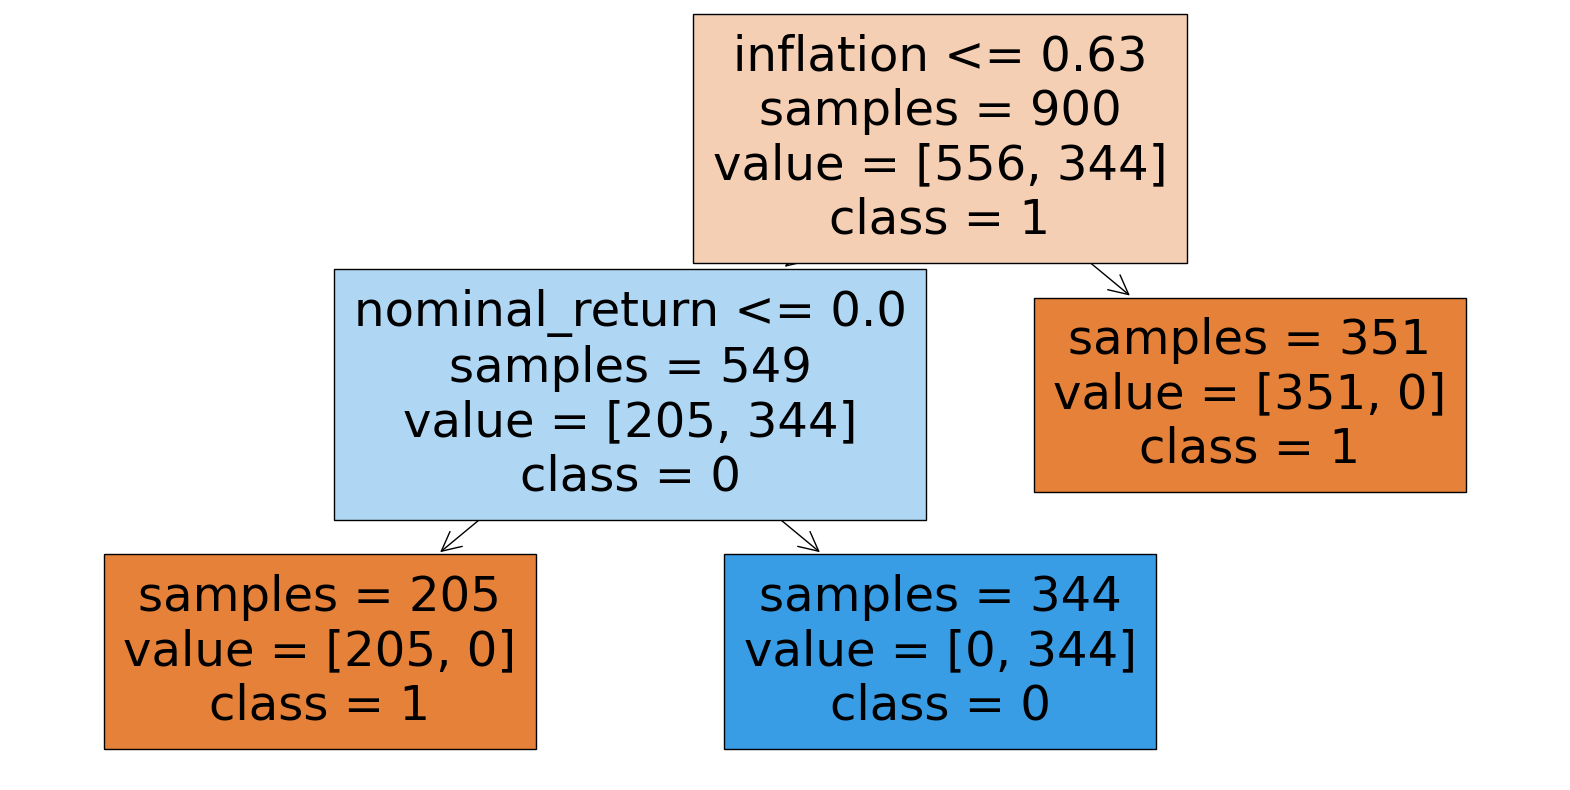

In [24]:

feature_names = data_1.columns.tolist()
# Graficar el árbol de decisión
plt.figure(figsize=(20,10))  # Tamaño del gráfico
plot_tree(tree, filled=True, feature_names=feature_names, class_names=["1", "0"], impurity=False)
plt.show()


Se observa como las variables más determinantes preliminarmente podrían ser "inflation", "nominal_return" y por ultimo, EPS_ratio. Para confirmarlo podemos usar el features_importances, puesto que esto nos brinda las variables que tienen mayor impacto en la predicción del modelo, es decir, lo que más reducen la impureza en cada nodo. 

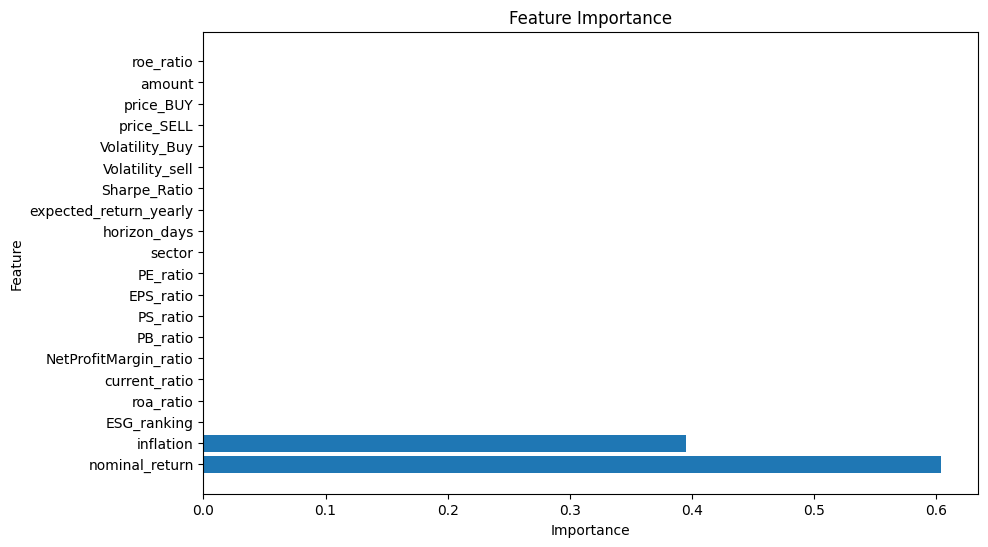

In [25]:
importances = tree.feature_importances_
importance_df = pd.DataFrame({"Feature": x.columns, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Visualizar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Podemos considerar como "inflation" y "nominal_ reuturn" como las variables de mayor aporte predictivo preliminarmente.

In [26]:
for column in data_1.columns:
    fig = px.box(data_1, x= "investment", y=column, color = "investment")
    fig.show()

* Es posible observar como se evidenciaba en el arbol de clasificación que los variables con mayor incidencia eran Inflation y nominal return. 

- Sector, horizon day,  amount, price sell, price buy, volatility buy, volatility sell, sharpe ratio, expect return, ESG ranking, PE ratio, EPS ratio, PS ratio, NetProfitmargin, current ratio, roa ratio y roe ratio no presentan aparentemente una fuerte tendencia hacia una categoria. Es decir, visualmente, no parecen ser determinantes en clasificar a una inversión como GOOD o BAD.

In [27]:
import plotly.express as px

# Supongamos que 'variable1' y 'variable2' son las dos variables categóricas que deseas comparar
fig = px.histogram(data, x='sector', color='investment')
fig.show()

Podemos visualizar que no hay presencia de un sector que presente una predominante tendencia de buena inversión o mala inversión. Y al ser la unica variable categorica, se decide no tenerla en consideración en el entrenamiento del modelo.

In [28]:
data_1= data_1.drop("sector", axis=1)

Usar correlación para verificar que datos se las variables independientes no cuenten con una relación lineal.

In [29]:
numeric_df = data_1.select_dtypes(include=['int', 'float'])


# Calcular matriz de correlación
matriz_correlacion = numeric_df.corr()
matriz_correlacion


,horizon_days,amount,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe_Ratio,expected_return_yearly,inflation,nominal_return,investment,ESG_ranking,PE_ratio,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
horizon_days,1.000000,0.057634,-0.019103,0.041087,-0.000782,0.079032,-0.000782,0.557271,0.000982,0.314202,0.048228,-0.056352,-0.030855,0.043956,0.058744,0.000010,0.049919,0.063964,0.059054,0.045002
amount,0.057634,1.000000,0.015068,0.019191,0.036155,-0.017119,0.036155,0.022659,0.024025,0.035272,0.013759,0.041535,-0.025461,-0.005007,0.003251,0.026403,-0.072575,-0.033395,-0.089766,-0.098832
price_BUY,-0.019103,0.015068,1.000000,0.975333,-0.074075,-0.054223,-0.074075,0.105182,0.091847,0.046071,0.009860,0.060159,0.317998,0.679935,0.219801,0.367833,0.112021,0.161695,0.158972,0.004417
price_SELL,0.041087,0.019191,0.975333,1.000000,-0.071000,-0.062839,-0.071000,0.165045,0.083859,0.142205,0.041373,0.058317,0.304729,0.698000,0.222112,0.350046,0.122658,0.172211,0.161950,0.002011
Volatility_Buy,-0.000782,0.036155,-0.074075,-0.071000,1.000000,0.850632,1.000000,0.166545,0.050158,0.065940,-0.057654,-0.079210,0.033027,-0.225247,0.237593,0.230903,-0.156604,0.194057,-0.054318,-0.265809
Volatility_sell,0.079032,-0.017119,-0.054223,-0.062839,0.850632,1.000000,0.850632,0.171310,0.070344,-0.039453,-0.168014,-0.123275,0.035551,-0.211890,0.187969,0.176131,-0.175065,0.175390,-0.040506,-0.258205
Sharpe_Ratio,-0.000782,0.036155,-0.074075,-0.071000,1.000000,0.850632,1.000000,0.166545,0.050158,0.065940,-0.057654,-0.079210,0.033027,-0.225247,0.237593,0.230903,-0.156604,0.194057,-0.054318,-0.265809
expected_return_yearly,0.557271,0.022659,0.105182,0.165045,0.166545,0.171310,0.166545,1.000000,0.022885,0.533747,0.132555,-0.088662,0.085136,0.038070,0.391668,0.361000,0.199539,0.263973,0.243156,-0.021053
inflation,0.000982,0.024025,0.091847,0.083859,0.050158,0.070344,0.050158,0.022885,1.000000,0.003025,-0.611535,-0.004853,-0.007222,-0.008672,0.048510,0.116725,-0.034308,-0.009438,0.041586,0.038014
nominal_return,0.314202,0.035272,0.046071,0.142205,0.065940,-0.039453,0.065940,0.533747,0.003025,1.000000,0.328053,-0.105205,0.025856,0.072892,0.118291,0.038219,0.152078,0.101896,0.134162,0.049182


In [30]:
heatmap = go.Heatmap(
    z=matriz_correlacion.values,  # valores de la correlación
    x=matriz_correlacion.columns,  # nombres de las columnas
    y=matriz_correlacion.columns,  # nombres de las filas
    colorscale='Viridis',  # paleta de colores
)

layout = go.Layout(title='Mapa de calor de correlación')

fig = go.Figure(data=[heatmap], layout=layout)

# Mostrar el mapa de calor
#pyo.plot(fig, filename='heatmap.html')
fig.show()